<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/ANN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,ElasticNet

In [3]:
from sklearn import datasets

In [4]:
data = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
datapd = pd.DataFrame(data.data)

In [6]:
datapd

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
datapd.columns = data.feature_names

In [8]:
datapd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
datapd['House price'] = pd.Series(np.asarray(data.target))

In [15]:
from sklearn.model_selection import train_test_split

In [14]:
x = datapd.iloc[:,:-1]
y = datapd.iloc[:,-1]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [17]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = lreg.predict(x_test)

In [19]:
MSE = np.mean((y_pred - y_test)**2)

In [20]:
MSE

18.32046042297069

In [21]:
lreg_coeff = pd.DataFrame()

In [22]:
lreg_coeff['Columns'] = x_train.columns
lreg_coeff['Coef_est'] = pd.Series(lreg.coef_)

In [23]:
lreg_coeff

,Columns,Coef_est
0,CRIM,-0.113386
1,ZN,0.038824
2,INDUS,0.026783
3,CHAS,2.928831
4,NOX,-19.890687
5,RM,3.675213
6,AGE,-0.002024
7,DIS,-1.587558
8,RAD,0.282986
9,TAX,-0.010643


In [24]:
import seaborn as sns

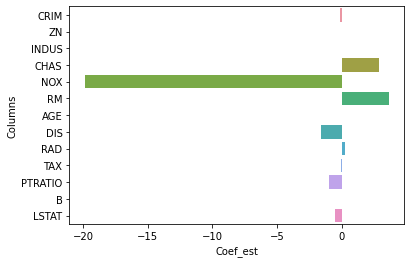

In [25]:
sns.barplot(x='Coef_est',y = 'Columns', data=lreg_coeff)

In [26]:
model = Ridge(alpha=1)
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)


In [27]:
MSE

18.190042801973437

In [31]:
ridgecoef = pd.DataFrame()
ridgecoef['Columns'] = x_train.columns
ridgecoef['Coest'] = pd.Series(model.coef_)

In [32]:
ridgecoef

,Columns,Coest
0,CRIM,-0.108533
1,ZN,0.039251
2,INDUS,-0.014324
3,CHAS,2.794740
4,NOX,-10.389158
5,RM,3.767977
6,AGE,-0.011094
7,DIS,-1.440908
8,RAD,0.259286
9,TAX,-0.011417


In [33]:
model1 = Lasso(alpha=1)

In [34]:
model1.fit(x_train,y_train)
y_pred= model1.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)

In [35]:
MSE

21.966918856692285

In [36]:
lascoef = pd.DataFrame()
lascoef['Columns'] = x_train.columns
lascoef['Coest'] = pd.Series(model1.coef_)

In [37]:
lascoef

,Columns,Coest
0,CRIM,-0.071600
1,ZN,0.032716
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.055252
6,AGE,0.011036
7,DIS,-0.748287
8,RAD,0.223332
9,TAX,-0.012610


In [38]:
model2 = ElasticNet(alpha=1,l1_ratio=0.4)

In [39]:
model2.fit(x_train,y_train)
y_pred= model2.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)

In [40]:
MSE

21.59439515137342

In [41]:
elacoef = pd.DataFrame()
elacoef['Columns'] = x_train.columns
elacoef['Coest'] = pd.Series(model2.coef_)

In [42]:
elacoef

,Columns,Coest
0,CRIM,-0.090422
1,ZN,0.037243
2,INDUS,-0.016798
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.968544
6,AGE,0.011819
7,DIS,-0.836884
8,RAD,0.272776
9,TAX,-0.014149


In [1]:
from keras.models import Sequential

In [2]:
from keras.layers import Dense

In [3]:
import pandas as pd
import numpy as np

In [4]:
file = '/content/pima-indians-diabetes.csv'
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']
df = pd.read_csv(file,names=names)

In [5]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [9]:
model = Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [32]:
history = model.fit(x_train,y_train,epochs=150,batch_size=15)

Epoch 1/150
36/36 [==============================] - 0s 4ms/step - loss: 0.5006 - accuracy: 0.7467
Epoch 2/150
36/36 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7598
Epoch 3/150
36/36 [==============================] - 0s 4ms/step - loss: 0.4941 - accuracy: 0.7691
Epoch 4/150
36/36 [==============================] - 0s 7ms/step - loss: 0.5093 - accuracy: 0.7449
Epoch 5/150
36/36 [==============================] - 0s 5ms/step - loss: 0.4900 - accuracy: 0.7709
Epoch 6/150
36/36 [==============================] - 0s 6ms/step - loss: 0.4913 - accuracy: 0.7616
Epoch 7/150
36/36 [==============================] - 0s 5ms/step - loss: 0.5060 - accuracy: 0.7467
Epoch 8/150
36/36 [==============================] - 0s 6ms/step - loss: 0.4857 - accuracy: 0.7728
Epoch 9/150
36/36 [==============================] - 0s 6ms/step - loss: 0.5000 - accuracy: 0.7691
Epoch 10/150
36/36 [==============================] - 0s 3ms/step - loss: 0.4978 - accuracy: 0.7728
Epoch 11/

In [33]:
scores = model.evaluate(x_train,y_train)

17/17 [==============================] - 0s 3ms/step - loss: 0.4392 - accuracy: 0.7896


In [34]:
scores

[0.43915218114852905, 0.7895717024803162]

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
y_pred = model.predict(x_test)

In [37]:
import numpy as np

In [38]:
accuracy_score(y_test,np.round(y_pred))

0.7012987012987013

In [39]:
a = model.history.history.keys()

In [40]:
a

dict_keys([])

In [41]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'accuracy')

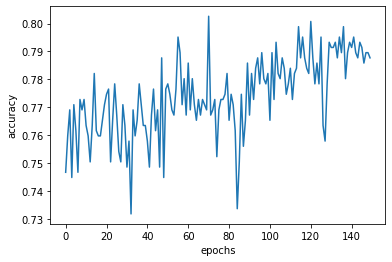

In [43]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs');plt.ylabel('accuracy')

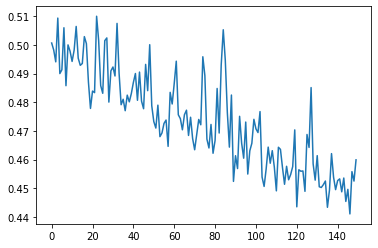

In [46]:
plt.plot(history.history['loss'])